# Zero-bias *(non-dissipative)* current
A quick examination of the current through the molecular junction when $\Delta\mu = 0$ eV, in the absence of a bosoniic bath coupled to the molecular vibration.

From the detailed balance relation (when $\Delta\mu = 0$):
$$
\frac{k^{R\rightarrow L}_{1\rightarrow 0}}{k^{L\rightarrow R}_{0\rightarrow 1}} = \frac{k^{L\rightarrow R}_{1\rightarrow 0}}{k^{R\rightarrow L}_{0\rightarrow 1}} = e^{\beta\omega_0}\,,
$$
and the expression of the current $I$ in terms of the rate constants. It is easy to show that $\Delta\mu = 0\implies I = 0$.

Thus, any significant deviations from nullity of the zero-bias current $I(\Delta\mu = 0)$ point to numerical instability, or a logic error in our `full_param_scan.py` code.

## ***Part I*** Examine zero-bias current

We study the conditions that lead to significant zero-bias current, and plot the distribution of values of $I(\Delta\mu = 0)$. We also examine how the zero-bias current varies with temperature.

### **Step 0:** Import relevant packages and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from param_parser import ParameterParser
import plt_utils
from rate_utils import *

# plt_utils.setup_tex() <---- doesn't work with Jupyter

plt.rcParams.update({'image.aspect': 'auto'})

kB = 8.617e-5
npydir = 'MAC_aligned_focused_max_dmu0.02_no_shift'
param_file = 'aligned_focused_max_dmu0.02.json'

pp = ParameterParser(param_file)

kappa_grid, w0_grid, muL_grid, temp_grid, e_grid = \
pp.load_grids(plist=['kappa_grid', 'frequency_grid','muL_grid',\
    'temperature_grid', 'energy_grid'])

dmu_grid = muL_grid * 2

I = np.moveaxis(np.load('%s/current_non-dis.npy'%npydir),2,-1) #move dmu axis to last position to use tensor_linregress painlessly
# axes of I are now: (w0, kappa, beta, dmu)

I_zero_bias = I[:,:,:,0] #I(dmu = 0)
I_finite_bias = I[:,:,:,1:] #I(dmu > 0)

print('Mean zero-bias current = ', np.mean(I_zero_bias))
print('Mean finite-bias current = ', np.mean(I_finite_bias))


['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']
Mean zero-bias current =  -2.7670831442975987e-06
Mean finite-bias current =  0.0008513020527118264


As we can see the mean zero-bias current isn't 0 and is two orders of magnitude smaller than the finite bias voltage. This seems a bit fishy. Let's investigate further.

### **Step 1:** Current heatmaps for different $(\omega_0,\,\kappa,\,T)$ conditions
Just to get a quick visual sense of what conditions lead to the highest zero-bias currents.


['DejaVu Sans', 'Bitstream Vera Sans', 'Computer Modern Sans Serif', 'Lucida Grande', 'Verdana', 'Geneva', 'Lucid', 'Arial', 'Helvetica', 'Avant Garde', 'sans-serif']


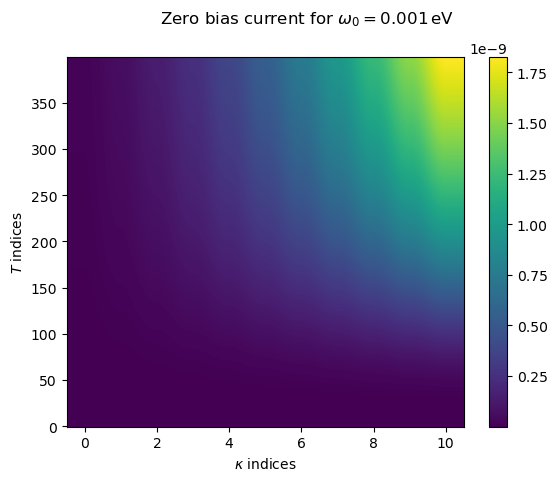

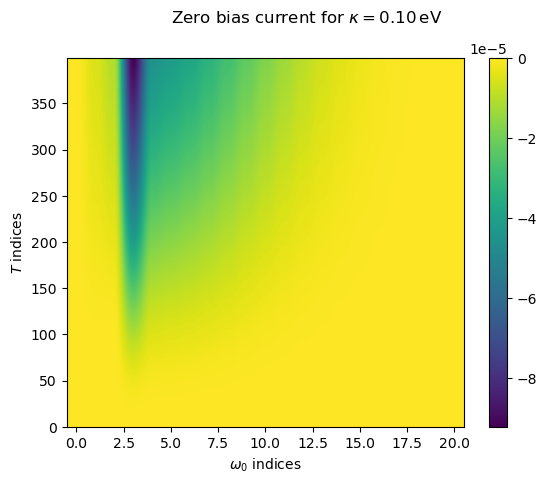

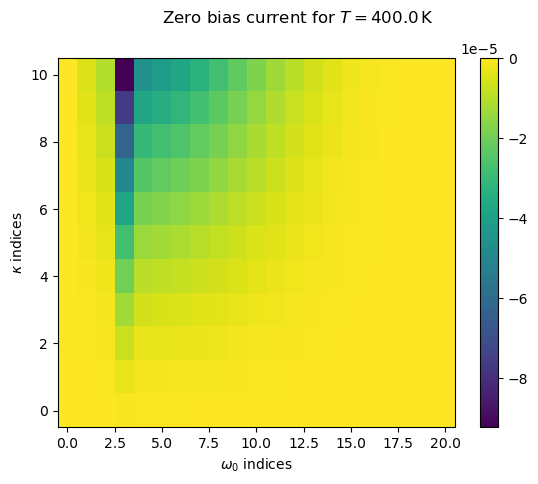

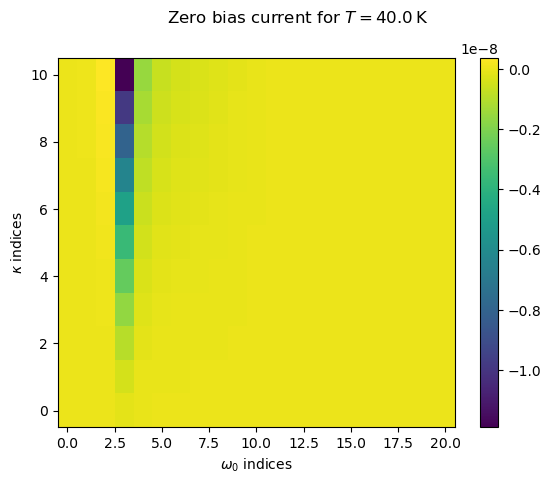

Argmax of zero-bias current:  (2, 10, 70)
Corresponds to:
     omega_0 = 0.0109 eV
     kappa = 0.1000 eV
     T = 103.15789473684211 K


In [2]:
plt.imshow(I_zero_bias[0].T,origin='lower')
plt.suptitle('Zero bias current for $\omega_0 = %5.3f\,$eV'%w0_grid[0])
plt.xlabel('$\kappa$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,-1,:].T,origin='lower')
plt.suptitle('Zero bias current for $\kappa = %4.2f\,$eV'%kappa_grid[-1])
plt.xlabel('$\omega_0$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,-1].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[-1])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,0].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[0])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

fishy_inds  = np.unravel_index(np.argmax(I_zero_bias),I_zero_bias.shape)
print('Argmax of zero-bias current: ', fishy_inds)
print(f'Corresponds to:\n \
    omega_0 = {w0_grid[fishy_inds[0]]:6.4f} eV\n \
    kappa = {kappa_grid[fishy_inds[1]]:6.4f} eV\n \
    T = {temp_grid[fishy_inds[2]]} K')

Now we fix each condition to the argmax of the zero-bias current $\{\tilde{\omega}_0,\,\tilde{\kappa},\,\tilde{T}\}$ and plot the $I(\Delta\mu = 0)$ heatmap along the other two axes.
Again, this is just to get a visual sense of how the zero-bias current varies with $(\omega_0,\,\kappa,\,T)$.

It's weird that the max zero-bias current occurs at $\tilde{T} = 68$ K... would expect to this at a much higher temperature. Should investigate this later. For now, we'll just plot the current heatmap at $\tilde{T}$ and the max temperature of our scan (i.e. 400K)...

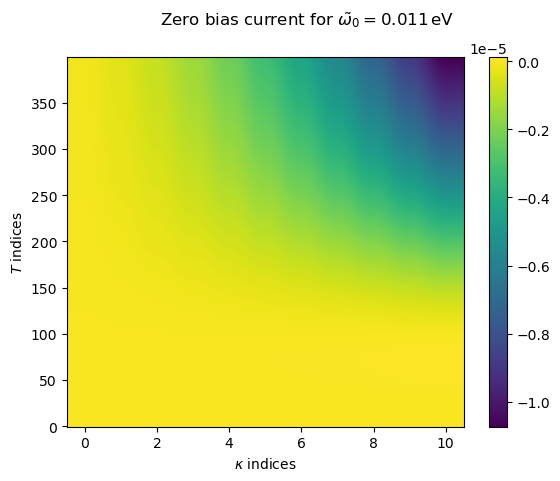

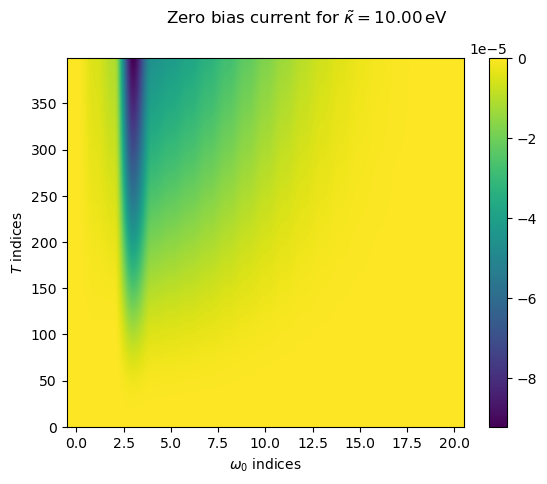

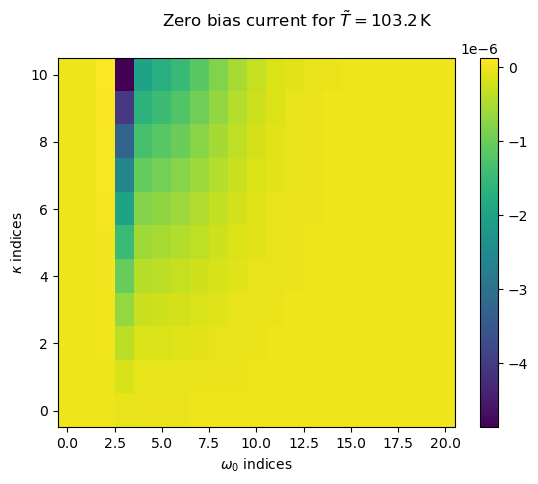

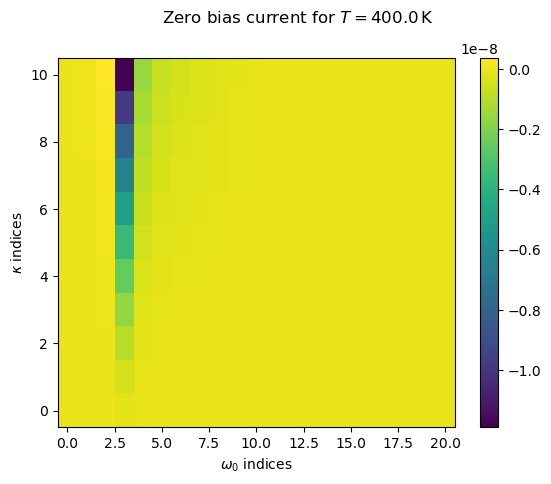

In [3]:
plt.imshow(I_zero_bias[fishy_inds[0]].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{\omega}_0 = %5.3f\,$eV'%w0_grid[fishy_inds[0]])
plt.xlabel('$\kappa$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,fishy_inds[1],:].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{\kappa} = %4.2f\,$eV'%fishy_inds[1])
plt.xlabel('$\omega_0$ indices')
plt.ylabel('$T$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,fishy_inds[2]].T,origin='lower')
plt.suptitle('Zero bias current for $\\tilde{T} = %5.1f\,$K'%temp_grid[fishy_inds[2]])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

plt.imshow(I_zero_bias[:,:,0].T,origin='lower')
plt.suptitle('Zero bias current for $T = %5.1f\,$K'%temp_grid[-1])
plt.ylabel('$\kappa$ indices')
plt.xlabel('$\omega_0$ indices')
plt.colorbar()
plt.show()

### **Step 2:** Plot the current distributions, both at $\Delta\mu = 0$ eV and for $\Delta\mu > 0$ eV.

0.5662012987012986


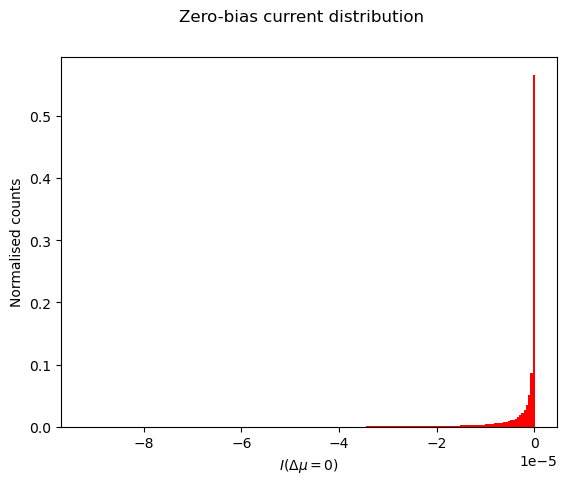

0.6310803957946816
0.9122510822510822


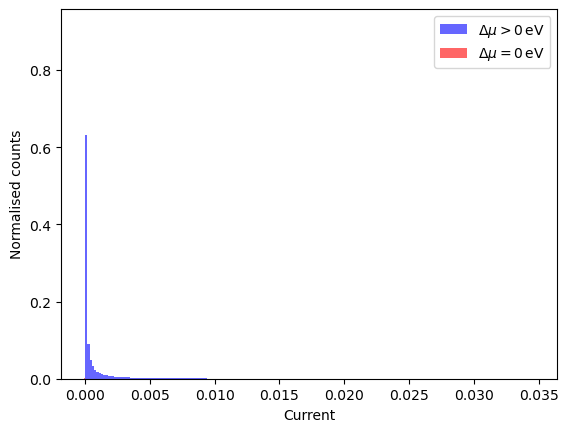

In [4]:
#Histogram of zero-bias current
plt_utils.histogram(I_zero_bias, nbins=200,xlabel='$I(\Delta\mu = 0)$',show=False,normalised=True)
plt.suptitle('Zero-bias current distribution')
plt.show()

#Histogram of all current, with dmu = 0 and dmu > 0 plotted separately
plt_utils.histogram(I_finite_bias,nbins=200,xlabel='Current',show=False,normalised=True,
        plt_kwargs={'alpha':0.6, 'color': 'b','label':'$\Delta\mu > 0\,$eV'})
plt_utils.histogram(I_zero_bias,nbins=10,xlabel='Current',show=False,normalised=True,
    plt_kwargs={'alpha':0.6, 'color': 'r','label':'$\Delta\mu = 0\,$eV'})
plt.legend()
plt.show()

**Remark:** The spurious zero-bias current seems to only be negative... This is strange. We'll get back to this later.

### **Step 3:** Temperature dependence of zero-bias current.

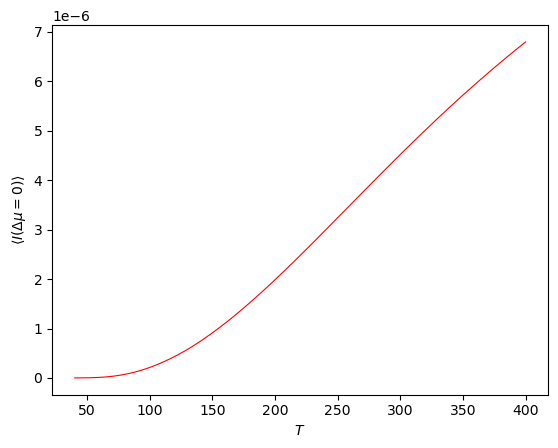

In [5]:
avg = np.mean(np.abs(I_zero_bias),axis=(0,1))
std = np.std(np.abs(I_zero_bias),axis=(0,1))
plt.plot(temp_grid,avg,'r-',lw=0.8)
#plt.plot(temp_grid,avg+std,'r--',lw=0.8)
#plt.plot(temp_grid,avg-std,'r--',lw=0.8)
plt.xlabel('$T$')
plt.ylabel('$\langle I(\Delta\mu = 0)\\rangle$')
plt.show()

## ***Part II*** Investigate how changing the model parameters affects the zero-bias current

It seems that for now, our code predicts $I(\Delta\mu = 0) < 0$. This is problematic. To understand why, we tinker with our choice of parameters and check out it alters our predictions for $I(\Delta\mu=0)$.

### **Step 4:** Examine consequences of increasing $\Gamma_L$ and $\Gamma_R$

**Hypothesis:** The values of the MO-lead couplings $\langle\Gamma_{\alpha}\rangle$ ($\alpha\in\{L,R\}$) are very small in our simulations ($\approx 2$ meV, see cell below). This leads to very narrow Lorentzians. If our integration grid isn't fine enough, the integral evaluation method could very well miss these Lorentzians' sharp variations which could lead to some pretty serious inaccuracies.

**Test 1 :** Increase $\Gamma_{\alpha}$. This will broaden the Lorentzians and should reduce/eliminate the numerical errors from the integral evaluation.

**Test 2:** Refine energy grid. In the calculations that yielded the results in part I, $\epsilon\in [-2\,\text{eV};2\,\text{eV}]$, and is sampled at 4000 points (uniformly spaced). Since most of the action happens very close to 0 (at the meV scale), we reduce the energy range to $[-0.5\,\text{eV};0.5\,\text{eV}]$ and increase the number of points to 10000, the refines the energy grid resolution tenfold.

In [ ]:
# Get values of couplings used to derive the above currents
_, _,  gamL, gamR, _ = pp.load_intrinsic()
print(gamL)
print(gamR)

